
# Regularized Regression

## How do Machine Learning Models Learn?

Machine learning models learn from data by identifying patterns and relationships between the independent variables (features) and the dependent variable (target). The learning process involves adjusting the model parameters to minimize the difference between the predicted values and the actual values of the target variable. This is typically done by minimizing a cost function, which quantifies the error in the model's predictions.

### Cost Function

The cost function, measures how well the model's predictions match the actual target values. In regression tasks, a common cost function is the Mean Squared Error (MSE), which is defined as: $$J(w) = \frac{1}{2m} \sum_{i=1}^{m} (y_i - \hat{y}_i)^2$$ where:

-   $J(w)$ is the cost function,
-   $m$ is the number of samples,
-   $y_i$ is the actual target value for the $i$-th sample,
-   $\hat{y}_i$ is the predicted target value for the $i$-th sample,
-   $w$ represents the model parameters (coefficients).

### Gradient Descent

Gradient descent is an optimization algorithm used to minimize the cost function by iteratively updating the model parameters in the direction of the steepest descent. The update rule for gradient descent is given by: $$w := w - \alpha \frac{\partial}{\partial w}J(w)$$ where:

-   $w$ is the vector of model parameters,
-   $\alpha$ is the learning rate (a hyperparameter that controls the step size of each update),
-   $\displaystyle\frac{\partial}{\partial w}J(w)$ is the gradient of the cost function with respect to the model parameters.

### Gradient Descent Algorithm

The gradient descent algorithm can be summarized in the following steps:

-   **Initialize Parameters**: Start with random values for the model parameters (coefficients).
-   **Compute Predictions**: Use the current parameters to compute the predicted values for the training data.
-   **Calculate Cost**: Compute the cost function (e.g., MSE) using the predicted values and the actual target values.
-   **Compute Gradient**: Calculate the gradient of the cost function with respect to the model parameters.
-   **Update Parameters**: Update the model parameters using the gradient descent update rule.
-   **Repeat**: Repeat until convergence (i.e., when the change in the cost function is below a certain threshold or a maximum number of iterations is reached).

## Overfitting and Underfitting

There are a few caveats to consider when working with machine learning models in general, and regression in particular. These include overfitting and underfitting, which can significantly affect the performance of your model.

-   **Overfitting**: occurs when a model learns the noise in the training data rather than the underlying pattern. This leads to a model that performs well on the training data but poorly on unseen data.
-   **Underfitting**: occurs when a model is too simple to capture the underlying pattern in the data. This results in poor performance on both the training and test data.

## Regularization

To address overfitting and underfitting, we can use regularization techniques. Regularization helps to constrain the model complexity by adding a penalty term to the loss function. This penalty discourages the model from fitting the noise in the data, leading to better generalization on unseen data. Regularization is particularly useful when dealing with high-dimensional datasets or when the number of features is greater than the number of observations.

Some common regularization techniques include:

1.  **Lasso Regression (L1 Regularization)**: Adds a penalty equal to the absolute value of the magnitude of coefficients. This can lead to sparse models where some coefficients are exactly zero, effectively performing feature selection.$$J(w) = \frac{1}{2m} \sum_{i=1}^{m} (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^{p} |w_j|$$ where $\lambda$ is the regularization strength and $p$ is the number of features.
2.  **Ridge Regression (L2 Regularization)**: Adds a penalty equal to the square of the magnitude of coefficients. This helps to shrink the coefficients but does not lead to sparse models. $$J(w) = \frac{1}{2m} \sum_{i=1}^{m} (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^{p} w_j^2$$ where $\lambda$ is the regularization strength and $p$ is the number of features.
3.  **Elastic Net**: Combines both L1 and L2 regularization, allowing for a balance between feature selection and coefficient shrinkage.

## Practical Demonstration

We will now demonstrate how to implement regularized regression using Lasso, Ridge, and Elastic Net regression methods from the `scikit-learn` library. We will use a synthetic dataset for this demonstration, but you can apply the same techniques to any regression dataset. In particular, we will introduce some correlations between features, which will allow us to see how regularization can help in feature selection and model performance.

-   Creating a Synthetic Dataset with Correlated Features

In [1]:
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd

n_samples, n_features = 100, 1

X, y, coef = make_regression(
    n_samples=n_samples,
    n_features=n_features,
    noise=7.5,
    coef=True,
    random_state=42
)

df = pd.DataFrame(X, columns=['feature'])
df['target'] = y

print(f"Original coefficients: {coef}")

Original coefficients: 41.7411003148779


-   Plotting the Synthetic Dataset

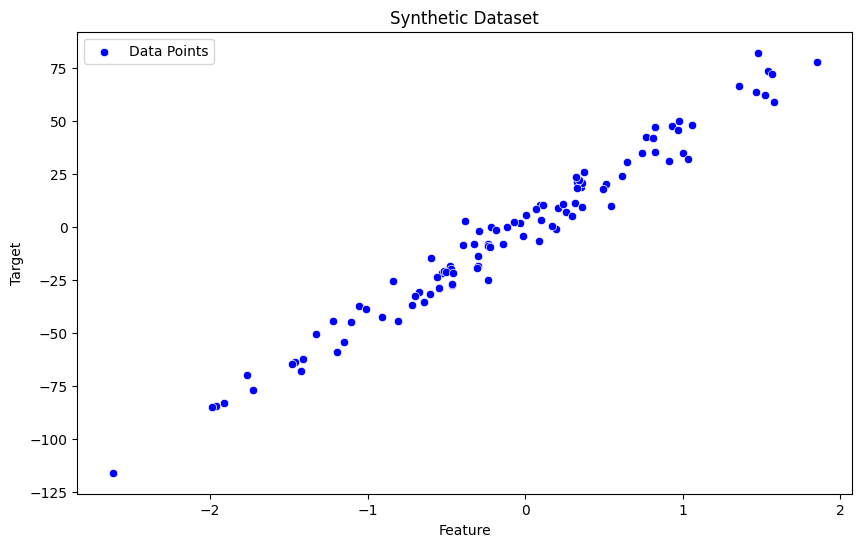

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='feature', y='target', color='blue', label='Data Points')
plt.title('Synthetic Dataset')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()

-   Introduce some correlation between features

In [3]:
X = np.column_stack((X, 2 * X[:, 0] + 0.01 * np.random.randn(n_samples)))  # Add a correlated feature
y += 0.5 * coef * X[:, 1]  # Introduce correlation with the target variable

# Adjust coefficients for the new feature
true_coefs = np.array([coef, 0.5 * coef])
print(f"Correlated coefficients: {true_coefs}")

import pandas as pd
df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])])
df['target'] = y

Correlated coefficients: [41.74110031 20.87055016]


-   Train a Simple Linear Regression Model

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a simple linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Evaluate the model
print(f'Linear Regression R^2 Score: {linear_model.score(X_test, y_test):.4f}')
print(f'Linear Regression Coefficients: {linear_model.coef_}')

Linear Regression R^2 Score: 0.9900
Linear Regression Coefficients: [37.12805251 24.11330234]


-   Train a Lasso Regression Model

In [5]:
from sklearn.linear_model import Lasso

# Train a Lasso regression model with alpha=0.1
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train, y_train)

# Evaluate the model
print(f'Lasso Regression R^2 Score: {lasso_model.score(X_test, y_test):.4f}')
print(f'Lasso Regression Coefficients: {lasso_model.coef_}')

Lasso Regression R^2 Score: 0.9901
Lasso Regression Coefficients: [8.53706697e+01 7.85428100e-03]


-   Train a Ridge Regression Model

In [6]:
from sklearn.linear_model import Ridge

# Train a Ridge regression model with alpha=0.1
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)

# Evaluate the model
print(f'Ridge Regression R^2 Score: {ridge_model.score(X_test, y_test):.4f}')
print(f'Ridge Regression Coefficients: {ridge_model.coef_}')

Ridge Regression R^2 Score: 0.9900
Ridge Regression Coefficients: [17.42423493 33.94453533]


-   Train an Elastic Net Regression Model

In [7]:
from sklearn.linear_model import ElasticNet

# Train an Elastic Net regression model with alpha=0.1 and l1_ratio=0.5
elastic_net_model = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net_model.fit(X_train, y_train)

# Evaluate the model
print(f'Elastic Net Regression R^2 Score: {elastic_net_model.score(X_test, y_test):.4f}')
print(f'Elastic Net Regression Coefficients: {elastic_net_model.coef_}')

Elastic Net Regression R^2 Score: 0.9896
Elastic Net Regression Coefficients: [16.49644689 33.888562  ]


-   Evaluate all the Models and visualize their predictions

R^2 Scores:
Linear Regression: 0.9900
Lasso Regression: 0.9901
Ridge Regression: 0.9900
Elastic Net Regression: 0.9896


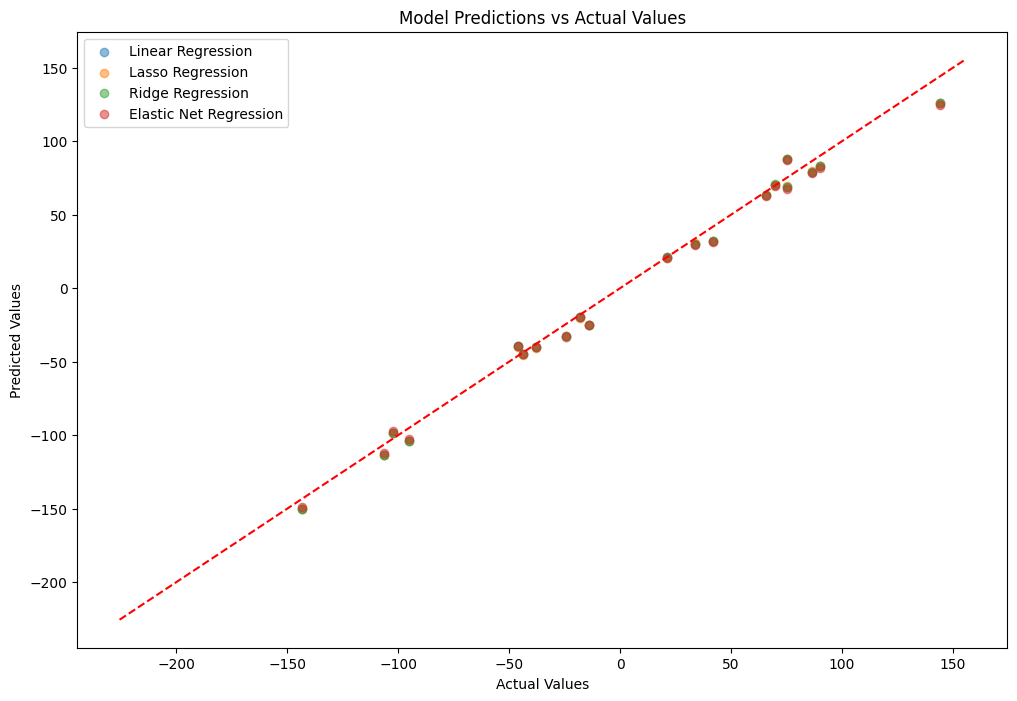

In [8]:
import numpy as np

# Predictions from all models
y_pred_linear = linear_model.predict(X_test)
y_pred_lasso = lasso_model.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test)
y_pred_elastic_net = elastic_net_model.predict(X_test)

# Calculate R^2 scores
r2_scores = {
    'Linear Regression': linear_model.score(X_test, y_test),
    'Lasso Regression': lasso_model.score(X_test, y_test),
    'Ridge Regression': ridge_model.score(X_test, y_test),
    'Elastic Net Regression': elastic_net_model.score(X_test, y_test)
}

print("R^2 Scores:")
for model, score in r2_scores.items():
    print(f"{model}: {score:.4f}")

# Visualize predictions
plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_pred_linear, label='Linear Regression', alpha=0.5)
plt.scatter(y_test, y_pred_lasso, label='Lasso Regression', alpha=0.5)
plt.scatter(y_test, y_pred_ridge, label='Ridge Regression', alpha=0.5)
plt.scatter(y_test, y_pred_elastic_net, label='Elastic Net Regression', alpha=0.5)

plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.title('Model Predictions vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

## Hands-on Exercises

-   **Lasso Regression**: Implement Lasso regression on a dataset of your choice. Experiment with different values of the regularization parameter `alpha` until you find the best model.

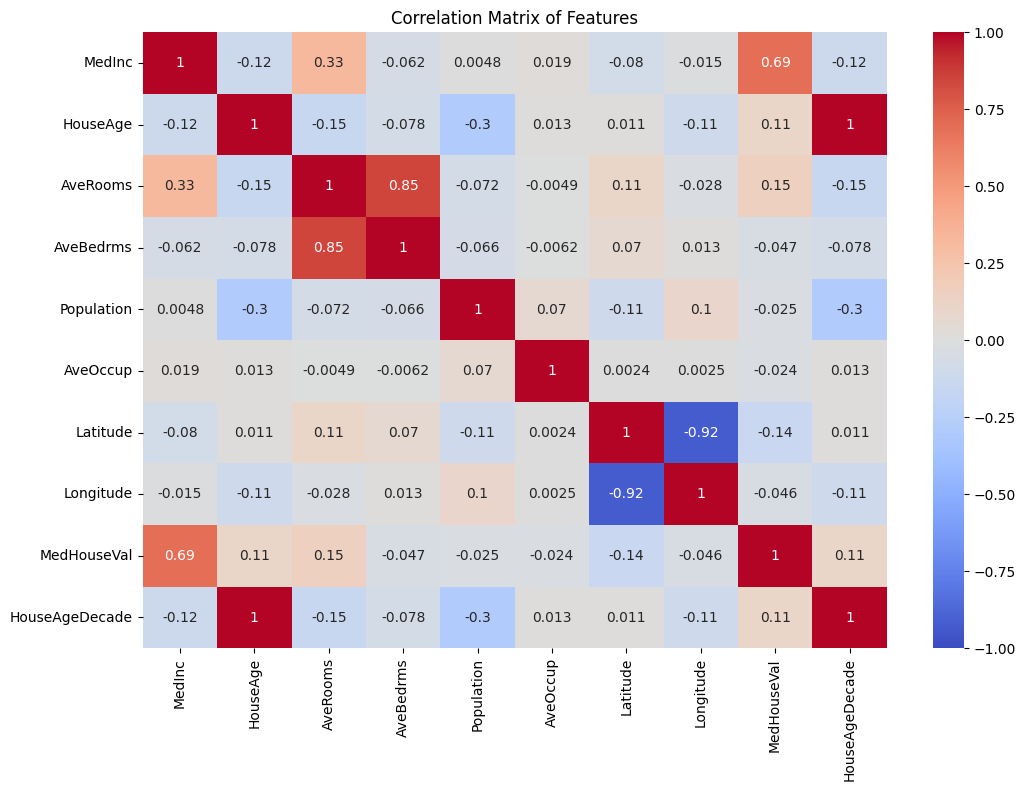

Linear Regression R^2 Score: 0.5758
Linear Regression Coefficients: [ 4.48674910e-01  9.62797774e-03 -1.23323343e-01  7.83144907e-01
 -2.02962058e-06 -3.52631849e-03 -4.19792487e-01 -4.33708065e-01
  9.62797774e-04]
Best Lasso Regression Alpha: 0.01
Best Lasso Regression R^2 Score: 0.5845
Best Lasso Regression Coefficients: [ 4.08895633e-01  1.03084903e-02 -4.74445356e-02  3.63345953e-01
 -3.08601298e-07 -3.35945603e-03 -4.07109935e-01 -4.14933167e-01
  0.00000000e+00]


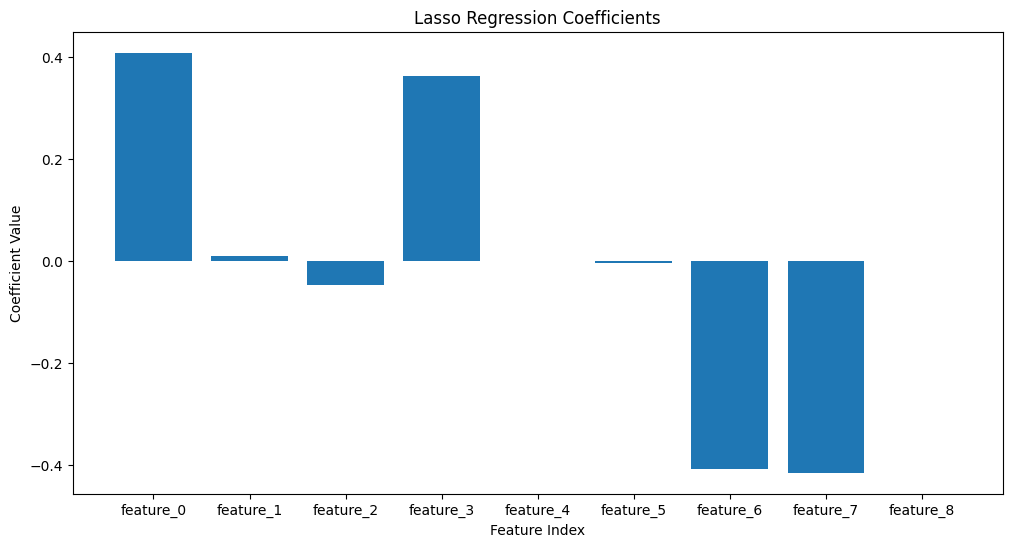

In [9]:
# Example code for Lasso regression
from sklearn.datasets import make_regression
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

# Load the California housing dataset
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing(as_frame=True)
df = data.frame
df['HouseAgeDecade'] = df['HouseAge'] / 10
X = df.drop(columns='MedHouseVal')
y = df['MedHouseVal']

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Features')
plt.show()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Regular Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
# Evaluate the model
print(f'Linear Regression R^2 Score: {linear_model.score(X_test, y_test):.4f}')
print(f'Linear Regression Coefficients: {linear_model.coef_}')

# Train a Lasso regression model with different alpha values
params = {'alpha': [0.01, 0.1, 1.0, 10.0]}
from sklearn.model_selection import GridSearchCV
lasso_model = Lasso()
grid_search = GridSearchCV(lasso_model, params, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)
best_lasso_model = grid_search.best_estimator_
print(f'Best Lasso Regression Alpha: {grid_search.best_params_["alpha"]}')
print(f'Best Lasso Regression R^2 Score: {best_lasso_model.score(X_test, y_test):.4f}')
print(f'Best Lasso Regression Coefficients: {best_lasso_model.coef_}')

# Visualize the coefficients
plt.figure(figsize=(12, 6))
plt.bar(range(len(best_lasso_model.coef_)), best_lasso_model.coef_)
plt.title('Lasso Regression Coefficients')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.xticks(range(len(best_lasso_model.coef_)), [f'feature_{i}' for i in range(len(best_lasso_model.coef_))])
plt.show()

-   **Ridge Regression**: Implement Ridge regression on the same dataset. Again, experiment with different values of `alpha` and compare the results with Lasso regression.

Best Ridge Regression Alpha: 10.0
Best Ridge Regression R^2 Score: 0.5764
Best Ridge Regression Coefficients: [ 4.47068597e-01  9.64485390e-03 -1.20293353e-01  7.66201258e-01
 -1.99123836e-06 -3.52184782e-03 -4.19720065e-01 -4.33421864e-01
  9.64485390e-04]


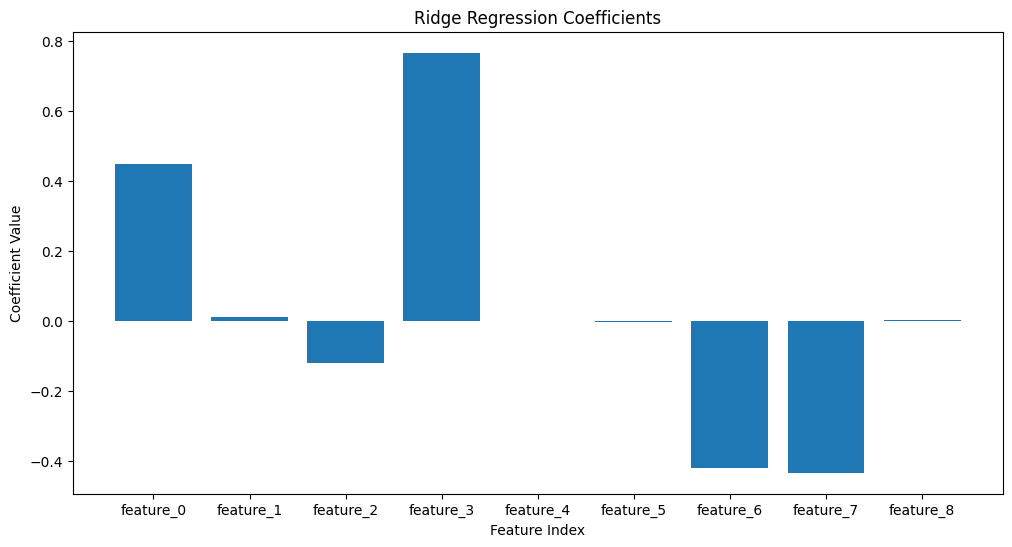

In [10]:
# Example code for Ridge regression
from sklearn.linear_model import Ridge

# Train a Ridge regression model with different alpha values
params = {'alpha': [0.01, 0.1, 1.0, 10.0]}
ridge_model = Ridge()
grid_search = GridSearchCV(ridge_model, params, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)
best_ridge_model = grid_search.best_estimator_
print(f'Best Ridge Regression Alpha: {grid_search.best_params_["alpha"]}')
print(f'Best Ridge Regression R^2 Score: {best_ridge_model.score(X_test, y_test):.4f}')
print(f'Best Ridge Regression Coefficients: {best_ridge_model.coef_}')

# Visualize the coefficients
plt.figure(figsize=(12, 6))
plt.bar(range(len(best_ridge_model.coef_)), best_ridge_model.coef_)
plt.title('Ridge Regression Coefficients')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.xticks(range(len(best_ridge_model.coef_)), [f'feature_{i}' for i in range(len(best_ridge_model.coef_))])
plt.show()

-   **Feature Importance**: Analyze the feature importance in both Lasso and Ridge regression models.

     Feature  Lasso Coefficients  Ridge Coefficients
0  feature_0        4.088956e-01            0.447069
1  feature_1        1.030849e-02            0.009645
2  feature_2       -4.744454e-02           -0.120293
3  feature_3        3.633460e-01            0.766201
4  feature_4       -3.086013e-07           -0.000002
5  feature_5       -3.359456e-03           -0.003522
6  feature_6       -4.071099e-01           -0.419720
7  feature_7       -4.149332e-01           -0.433422
8  feature_8        0.000000e+00            0.000964


<Figure size 1200x600 with 0 Axes>

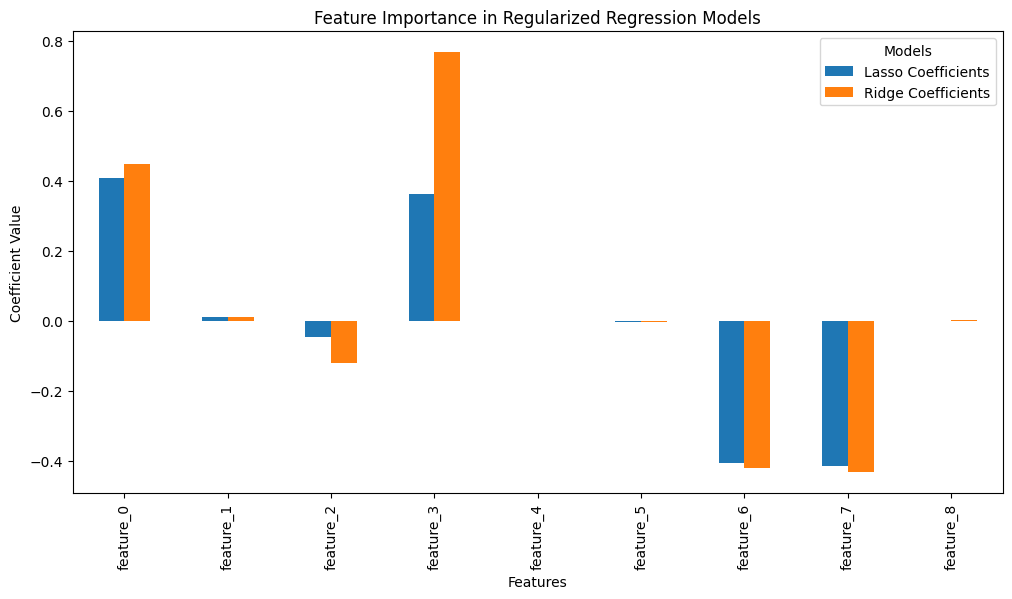

In [11]:
# Example code for feature importance analysis
import pandas as pd

# Create a DataFrame to hold the coefficients
coefficients = pd.DataFrame({
    'Feature': [f'feature_{i}' for i in range(X.shape[1])],
    'Lasso Coefficients': best_lasso_model.coef_,
    'Ridge Coefficients': best_ridge_model.coef_
})

print(coefficients)

# Visualize feature importance
plt.figure(figsize=(12, 6))
coefficients.set_index('Feature').plot(kind='bar', figsize=(12, 6))
plt.title('Feature Importance in Regularized Regression Models')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.legend(title='Models')
plt.show()